In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import numpy as np

C:\noklab\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
darts = pd.read_csv('darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


C:\noklab\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


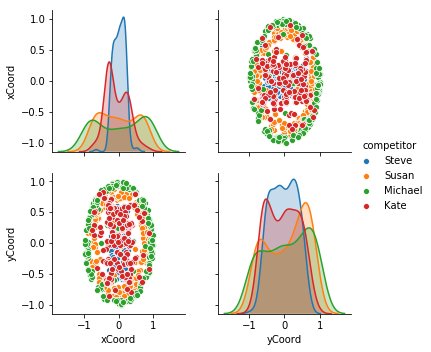

In [3]:
# Use pairplot and set the hue to be our class
sns.pairplot(darts, hue='competitor') 

# Show the plot
plt.show()

In [4]:
# Import the sequential model and dense layer
import keras
from keras.models import Sequential
from keras.layers import Dense

# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor)

Label encoded competitors: 
 0      2
1      3
2      1
3      0
4      2
      ..
795    0
796    2
797    1
798    1
799    3
Name: competitor, Length: 800, dtype: int8


In [5]:
competitors = pd.get_dummies(darts['competitor'])
coord = darts.drop('competitor', axis=1)
coord_train,coord_test,competitors_train,competitors_test = train_test_split(coord, competitors, test_size=0.2)

In [6]:

# Train your model on the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
640/640 [==============================] - 0s 462us/step - loss: 1.3745 - acc: 0.2359
Epoch 2/200
640/640 [==============================] - 0s 65us/step - loss: 1.3341 - acc: 0.3375
Epoch 3/200
640/640 [==============================] - 0s 55us/step - loss: 1.2800 - acc: 0.4219
Epoch 4/200
640/640 [==============================] - 0s 58us/step - loss: 1.1973 - acc: 0.5156
Epoch 5/200
640/640 [==============================] - 0s 58us/step - loss: 1.0777 - acc: 0.5609
Epoch 6/200
640/640 [==============================] - 0s 56us/step - loss: 0.9576 - acc: 0.5969
Epoch 7/200
640/640 [==============================] - 0s 55us/step - loss: 0.8799 - acc: 0.6500
Epoch 8/200
640/640 [==============================] - 0s 58us/step - loss: 0.8233 - acc: 0.6969
Epoch 9/200
640/640 [==============================] - 0s 58us/step - loss: 0.7920 - acc: 0.7047
Epoch 10/200
640/640 [==============================] - 0s 79us/step - loss: 0.7689 - acc: 0.7094
Epoch 11/200
640/640 [======

640/640 [==============================] - 0s 50us/step - loss: 0.5504 - acc: 0.7984
Epoch 85/200
640/640 [==============================] - 0s 50us/step - loss: 0.5543 - acc: 0.8047
Epoch 86/200
640/640 [==============================] - 0s 53us/step - loss: 0.5401 - acc: 0.8047
Epoch 87/200
640/640 [==============================] - 0s 51us/step - loss: 0.5370 - acc: 0.8234
Epoch 88/200
640/640 [==============================] - 0s 51us/step - loss: 0.5397 - acc: 0.8062
Epoch 89/200
640/640 [==============================] - 0s 53us/step - loss: 0.5369 - acc: 0.8109
Epoch 90/200
640/640 [==============================] - 0s 51us/step - loss: 0.5324 - acc: 0.8094
Epoch 91/200
640/640 [==============================] - 0s 50us/step - loss: 0.5380 - acc: 0.8062
Epoch 92/200
640/640 [==============================] - 0s 50us/step - loss: 0.5401 - acc: 0.8047
Epoch 93/200
640/640 [==============================] - 0s 55us/step - loss: 0.5333 - acc: 0.8031
Epoch 94/200
640/640 [===========

640/640 [==============================] - 0s 50us/step - loss: 0.4834 - acc: 0.8328
Epoch 168/200
640/640 [==============================] - 0s 53us/step - loss: 0.4893 - acc: 0.8219
Epoch 169/200
640/640 [==============================] - 0s 48us/step - loss: 0.5017 - acc: 0.8109
Epoch 170/200
640/640 [==============================] - 0s 51us/step - loss: 0.4899 - acc: 0.8156
Epoch 171/200
640/640 [==============================] - 0s 51us/step - loss: 0.4984 - acc: 0.8125
Epoch 172/200
640/640 [==============================] - 0s 50us/step - loss: 0.5011 - acc: 0.8062
Epoch 173/200
640/640 [==============================] - 0s 48us/step - loss: 0.4895 - acc: 0.8156
Epoch 174/200
640/640 [==============================] - 0s 53us/step - loss: 0.4906 - acc: 0.8281
Epoch 175/200
640/640 [==============================] - 0s 50us/step - loss: 0.4835 - acc: 0.8250
Epoch 176/200
640/640 [==============================] - 0s 55us/step - loss: 0.4850 - acc: 0.8234
Epoch 177/200
640/640 [=